## Дамашнее задание

  1. Постройте нейронную сеть (берем несложную полносвязную сеть, меняем число слоев, число нейронов, типы активации, тип оптимизатора) на датасете from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу.  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Sequential, Model

%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
tf.random.set_seed(1)

In [4]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = boston["data"]
target = boston["target"]

In [6]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
y = pd.DataFrame(target, columns=["price"])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [11]:
# Масштабирование
X_scale = StandardScaler().fit(X).transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.25, random_state=0)

In [13]:
results = pd.DataFrame() # сводная таблица результатов
n_layers = [] # число слоев
n_neurons = [] # число нейронов
act_func = [] # функция активации
opt = [] # оптимизатор
loss_func = [] # функция потерь
metrics = [] # метрика
train_mae = [] # ошибка на тренировочной выборке
test_mae = [] # ошибка на тестовой выборке

- n_layers: 2, 4 и 8
- n_neurons: 32, 64 и 128
- act_func: ReLU, ELU, sigmoid и tanh
- opt: RMSProp и Adam


Параметры текущей нейронной сети: 2 слоя, 32 нейронов, функция активации relu, оптимизатор RMSprop...
12/12 - 0s - loss: 539.6168 - mae: 21.7856
4/4 - 0s - loss: 539.4099 - mae: 21.7516

Параметры текущей нейронной сети: 2 слоя, 32 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 537.8657 - mae: 21.8507
4/4 - 0s - loss: 531.0154 - mae: 21.6108

Параметры текущей нейронной сети: 2 слоя, 32 нейронов, функция активации elu, оптимизатор RMSprop...
12/12 - 0s - loss: 549.0317 - mae: 21.8446
4/4 - 0s - loss: 542.2001 - mae: 21.5797

Параметры текущей нейронной сети: 2 слоя, 32 нейронов, функция активации elu, оптимизатор Adam...
12/12 - 0s - loss: 527.3770 - mae: 21.8090
4/4 - 0s - loss: 526.9142 - mae: 21.7272

Параметры текущей нейронной сети: 2 слоя, 32 нейронов, функция активации sigmoid, оптимизатор RMSprop...
12/12 - 0s - loss: 534.7772 - mae: 21.7868
4/4 - 0s - loss: 537.6209 - mae: 21.7439

Параметры текущей нейронной сети: 2 слоя, 32 нейронов, функция актива

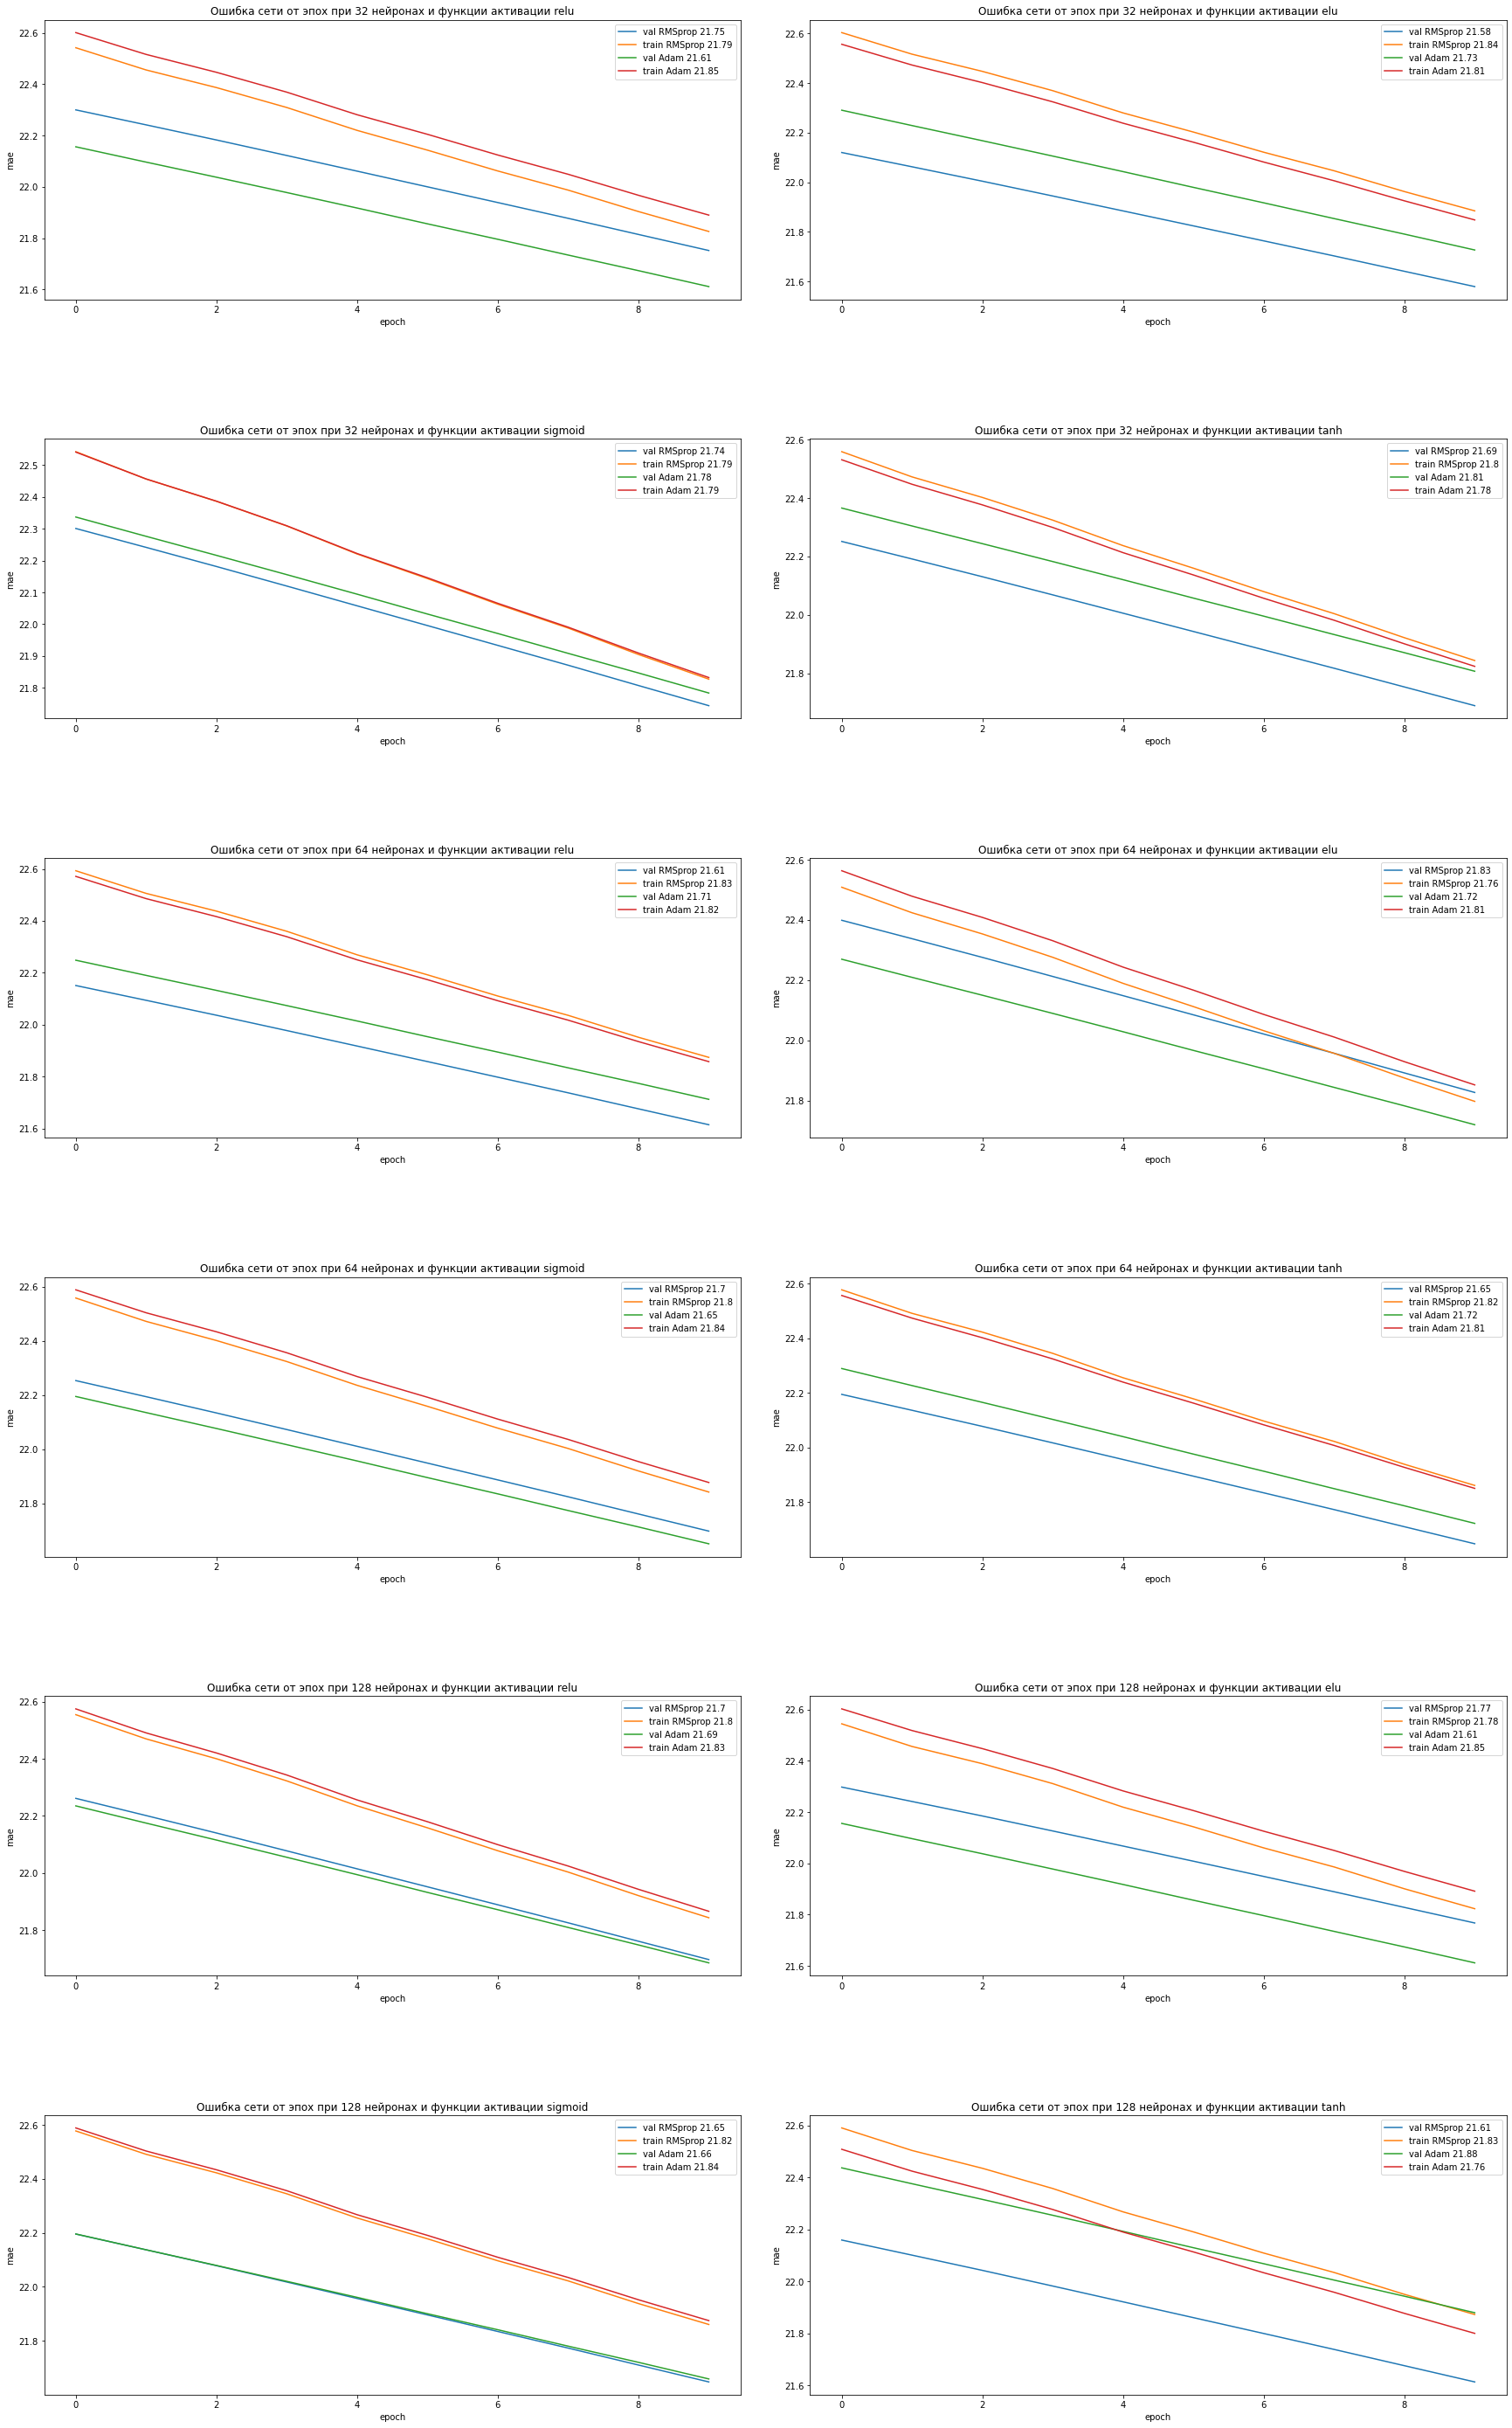

In [14]:
# Рассмотрим 2-слойную сеть
fig = plt.figure(figsize=(30, 50))
plt.subplots_adjust(wspace=0.1, hspace=0.5)
k = 0
for n in [32, 64, 128]:
  for f in ['relu', 'elu', 'sigmoid', 'tanh']:
    k += 1
    for o in ['RMSprop', 'Adam']:
      n_layers.append(2)
      n_neurons.append(n)
      act_func.append(f)
      opt.append(o)
        
      print(f'\nПараметры текущей нейронной сети: 2 слоя, {n} нейронов, функция активации {f}, оптимизатор {o}...')

      inputs = Input(shape=(13,))
      x_1 = Flatten()(inputs)
      outputs = Dense(1)(x_1)

      model = Model(inputs, outputs)

      model.compile(optimizer=o,
                    loss='mse',
                    metrics=['mae'])

      #model.summary()

      history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=5,
                    validation_data=(X_test, y_test), 
                    verbose=0)

      train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
      test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)
      train_mae.append(train_m)
      test_mae.append(test_m)
      
      ax = fig.add_subplot(6, 2, k)
      ax.plot(history.history['val_mae'], label=f'val {o} {round(test_m, 2)}')
      ax.plot(history.history['mae'], label=f'train {o} {round(train_m, 2)}')
      ax.legend()
      ax.set_xlabel('epoch')
      ax.set_ylabel('mae')
      ax.set(title = f'Ошибка сети от эпох при {n} нейронах и функции активации {f}')
plt.show()


Параметры текущей нейронной сети: 4 слоя, 32 нейронов, функция активации relu, оптимизатор RMSprop...
12/12 - 0s - loss: 13.7406 - mae: 2.6102
4/4 - 0s - loss: 25.7925 - mae: 3.4433

Параметры текущей нейронной сети: 4 слоя, 32 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 14.0536 - mae: 2.6466
4/4 - 0s - loss: 29.4386 - mae: 3.7786

Параметры текущей нейронной сети: 4 слоя, 32 нейронов, функция активации elu, оптимизатор RMSprop...
12/12 - 0s - loss: 16.9190 - mae: 2.7697
4/4 - 0s - loss: 30.0844 - mae: 3.5991

Параметры текущей нейронной сети: 4 слоя, 32 нейронов, функция активации elu, оптимизатор Adam...
12/12 - 0s - loss: 16.3882 - mae: 2.7733
4/4 - 0s - loss: 30.1213 - mae: 3.6362

Параметры текущей нейронной сети: 4 слоя, 32 нейронов, функция активации sigmoid, оптимизатор RMSprop...
12/12 - 0s - loss: 63.8304 - mae: 5.2348
4/4 - 0s - loss: 67.4217 - mae: 5.1219

Параметры текущей нейронной сети: 4 слоя, 32 нейронов, функция активации sigmoid, оптимиз

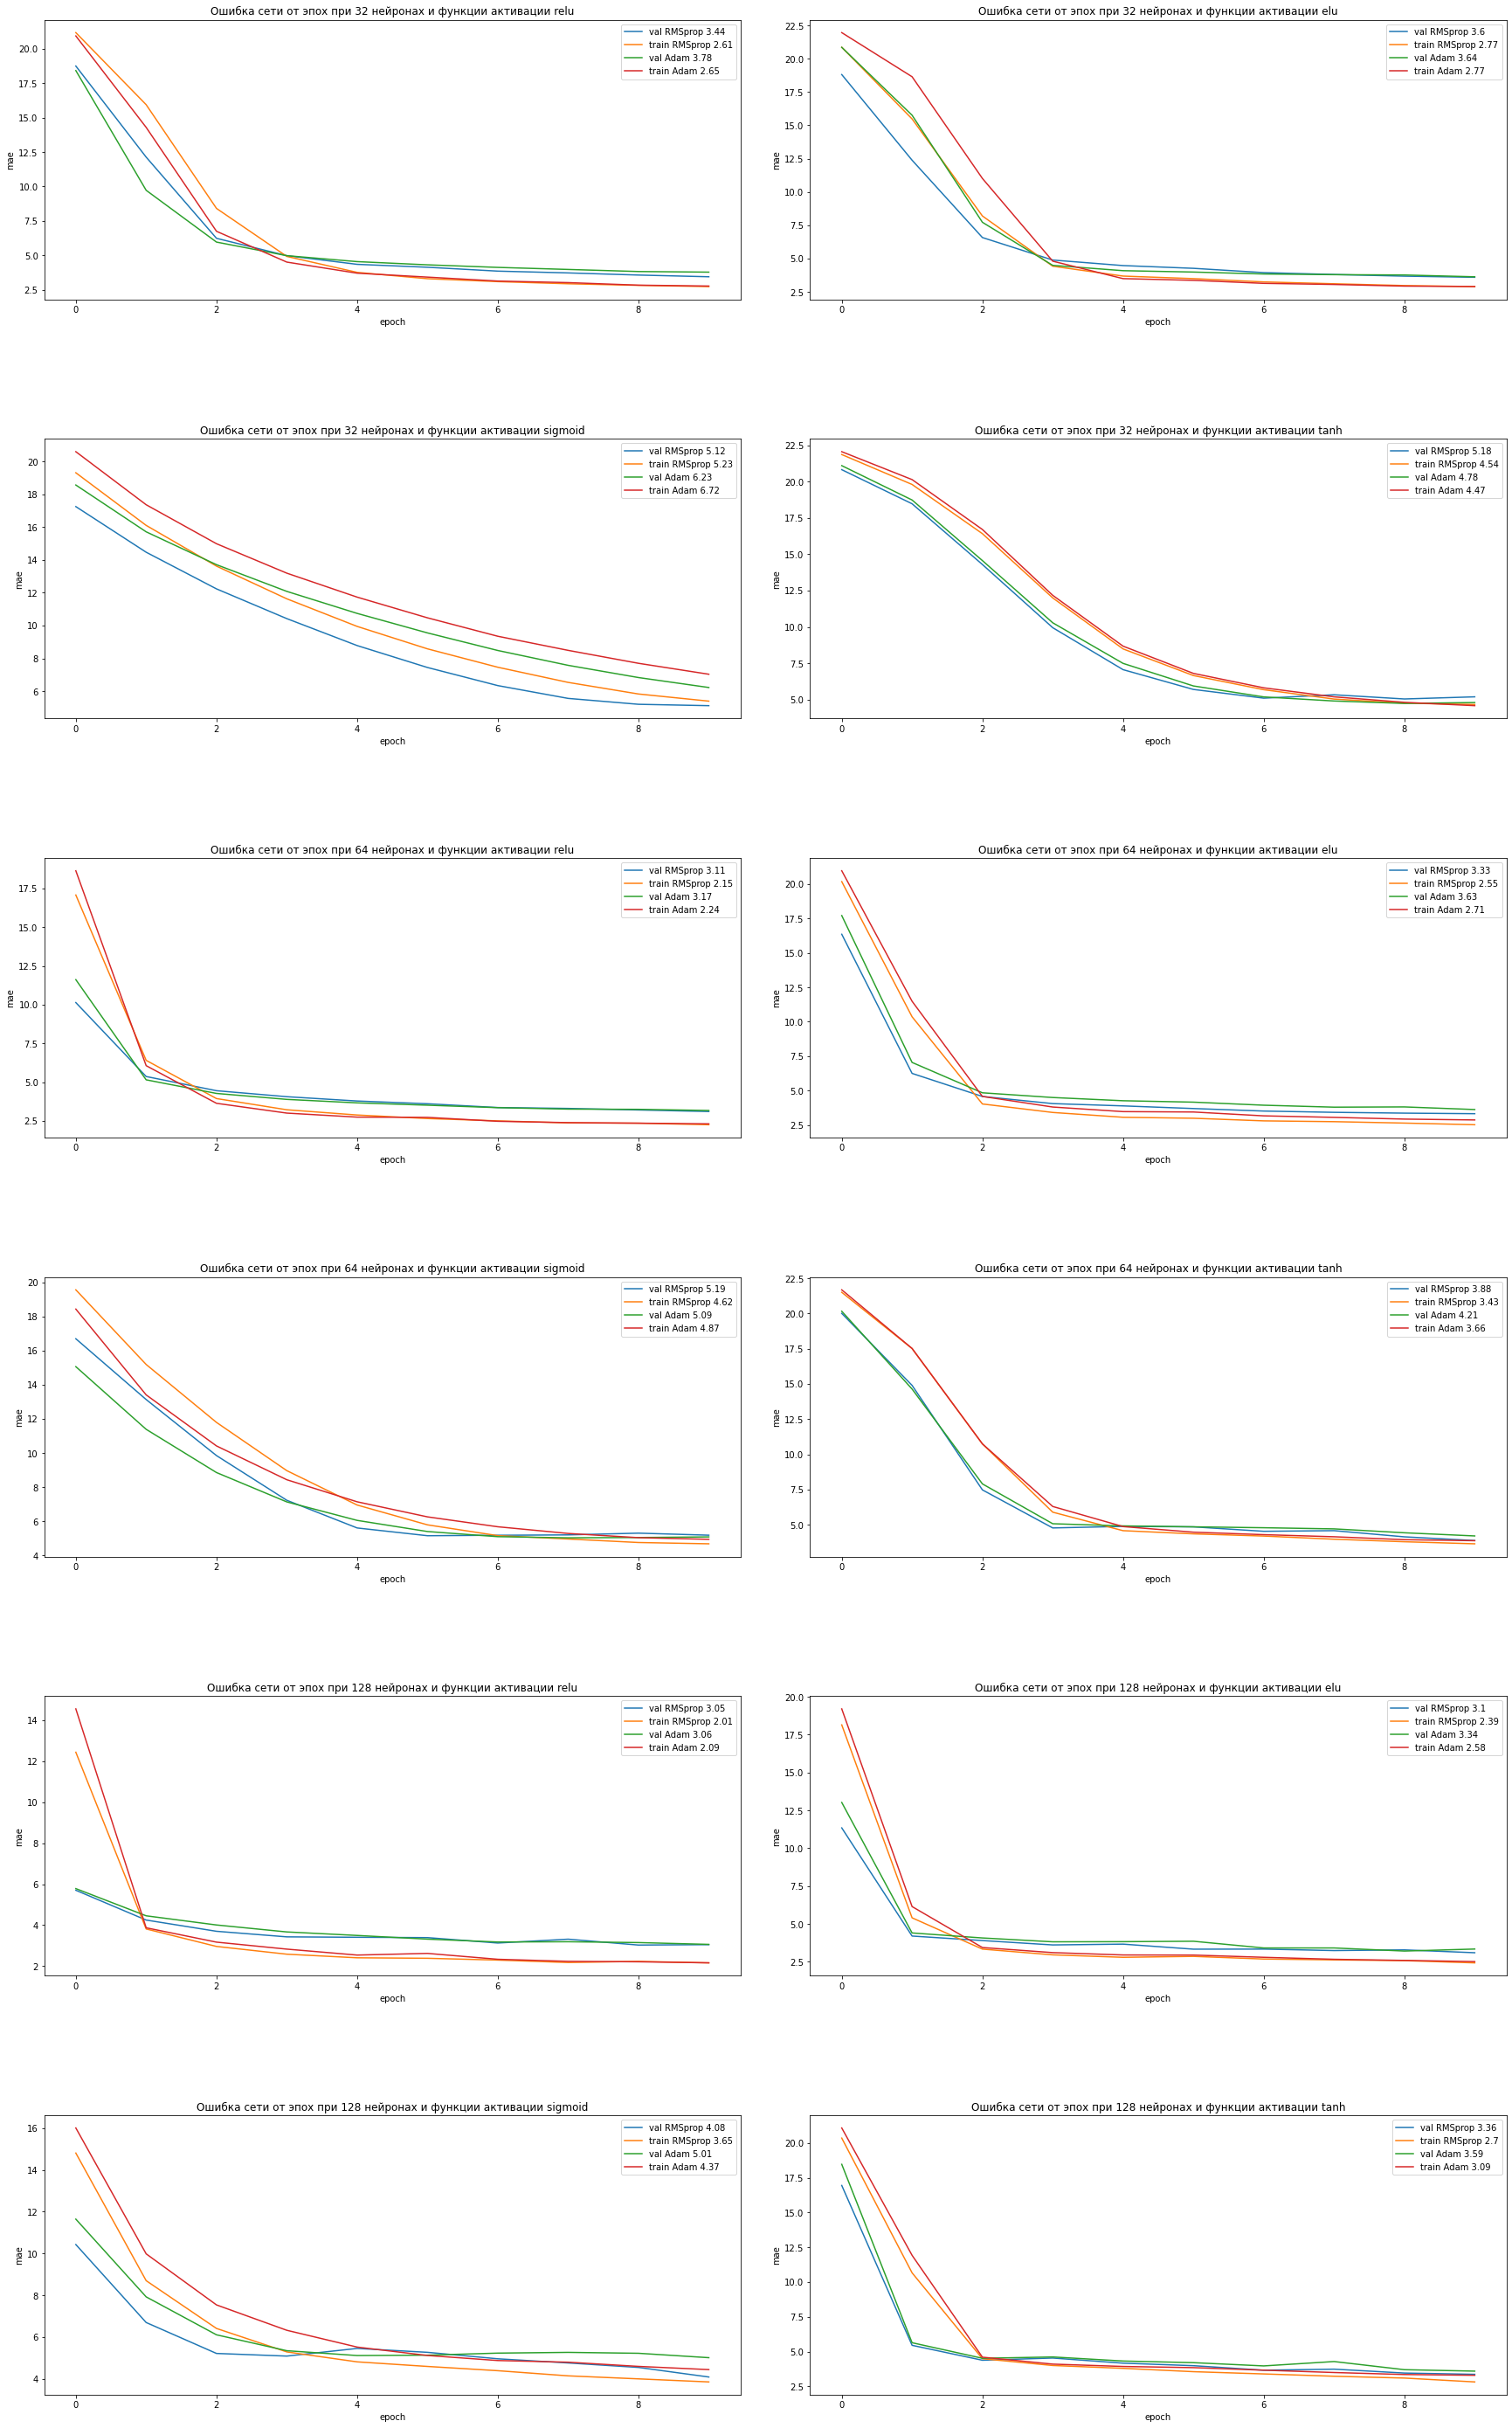

In [15]:
# Рассмотрим 4-слойную сеть
fig = plt.figure(figsize=(30, 50))
plt.subplots_adjust(wspace=0.1, hspace=0.5)
k = 0
for n in [32, 64, 128]:
  for f in ['relu', 'elu', 'sigmoid', 'tanh']:
    k += 1
    for o in ['RMSprop', 'Adam']:
      n_layers.append(4)
      n_neurons.append(n)
      act_func.append(f)
      opt.append(o)
        
      print(f'\nПараметры текущей нейронной сети: 4 слоя, {n} нейронов, функция активации {f}, оптимизатор {o}...')

      inputs = Input(shape=(13,))
      x_1 = Flatten()(inputs)
      x_2 = Dense(n, activation=f)(x_1)
      x_3 = Dense(n, activation=f)(x_2)
      outputs = Dense(1)(x_3)

      model = Model(inputs, outputs)

      model.compile(optimizer=o,
                    loss='mse',
                    metrics=['mae'])

      #model.summary()

      history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=5,
                    validation_data=(X_test, y_test), 
                    verbose=0)

      train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
      test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)
      train_mae.append(train_m)
      test_mae.append(test_m)
      
      ax = fig.add_subplot(6, 2, k)
      ax.plot(history.history['val_mae'], label=f'val {o} {round(test_m, 2)}')
      ax.plot(history.history['mae'], label=f'train {o} {round(train_m, 2)}')
      ax.legend()
      ax.set_xlabel('epoch')
      ax.set_ylabel('mae')
      ax.set(title = f'Ошибка сети от эпох при {n} нейронах и функции активации {f}')
plt.show()


Параметры текущей нейронной сети: 8 слоя, 32 нейронов, функция активации relu, оптимизатор RMSprop...
12/12 - 0s - loss: 10.6437 - mae: 2.3321
4/4 - 0s - loss: 23.8029 - mae: 3.2442

Параметры текущей нейронной сети: 8 слоя, 32 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 7.2773 - mae: 2.0434
4/4 - 0s - loss: 18.6839 - mae: 3.0192

Параметры текущей нейронной сети: 8 слоя, 32 нейронов, функция активации elu, оптимизатор RMSprop...
12/12 - 0s - loss: 11.9497 - mae: 2.3710
4/4 - 0s - loss: 22.5703 - mae: 3.0066

Параметры текущей нейронной сети: 8 слоя, 32 нейронов, функция активации elu, оптимизатор Adam...
12/12 - 0s - loss: 10.3710 - mae: 2.2915
4/4 - 0s - loss: 19.5814 - mae: 3.0157

Параметры текущей нейронной сети: 8 слоя, 32 нейронов, функция активации sigmoid, оптимизатор RMSprop...
12/12 - 0s - loss: 90.6521 - mae: 6.7470
4/4 - 0s - loss: 85.7364 - mae: 6.0728

Параметры текущей нейронной сети: 8 слоя, 32 нейронов, функция активации sigmoid, оптимиза

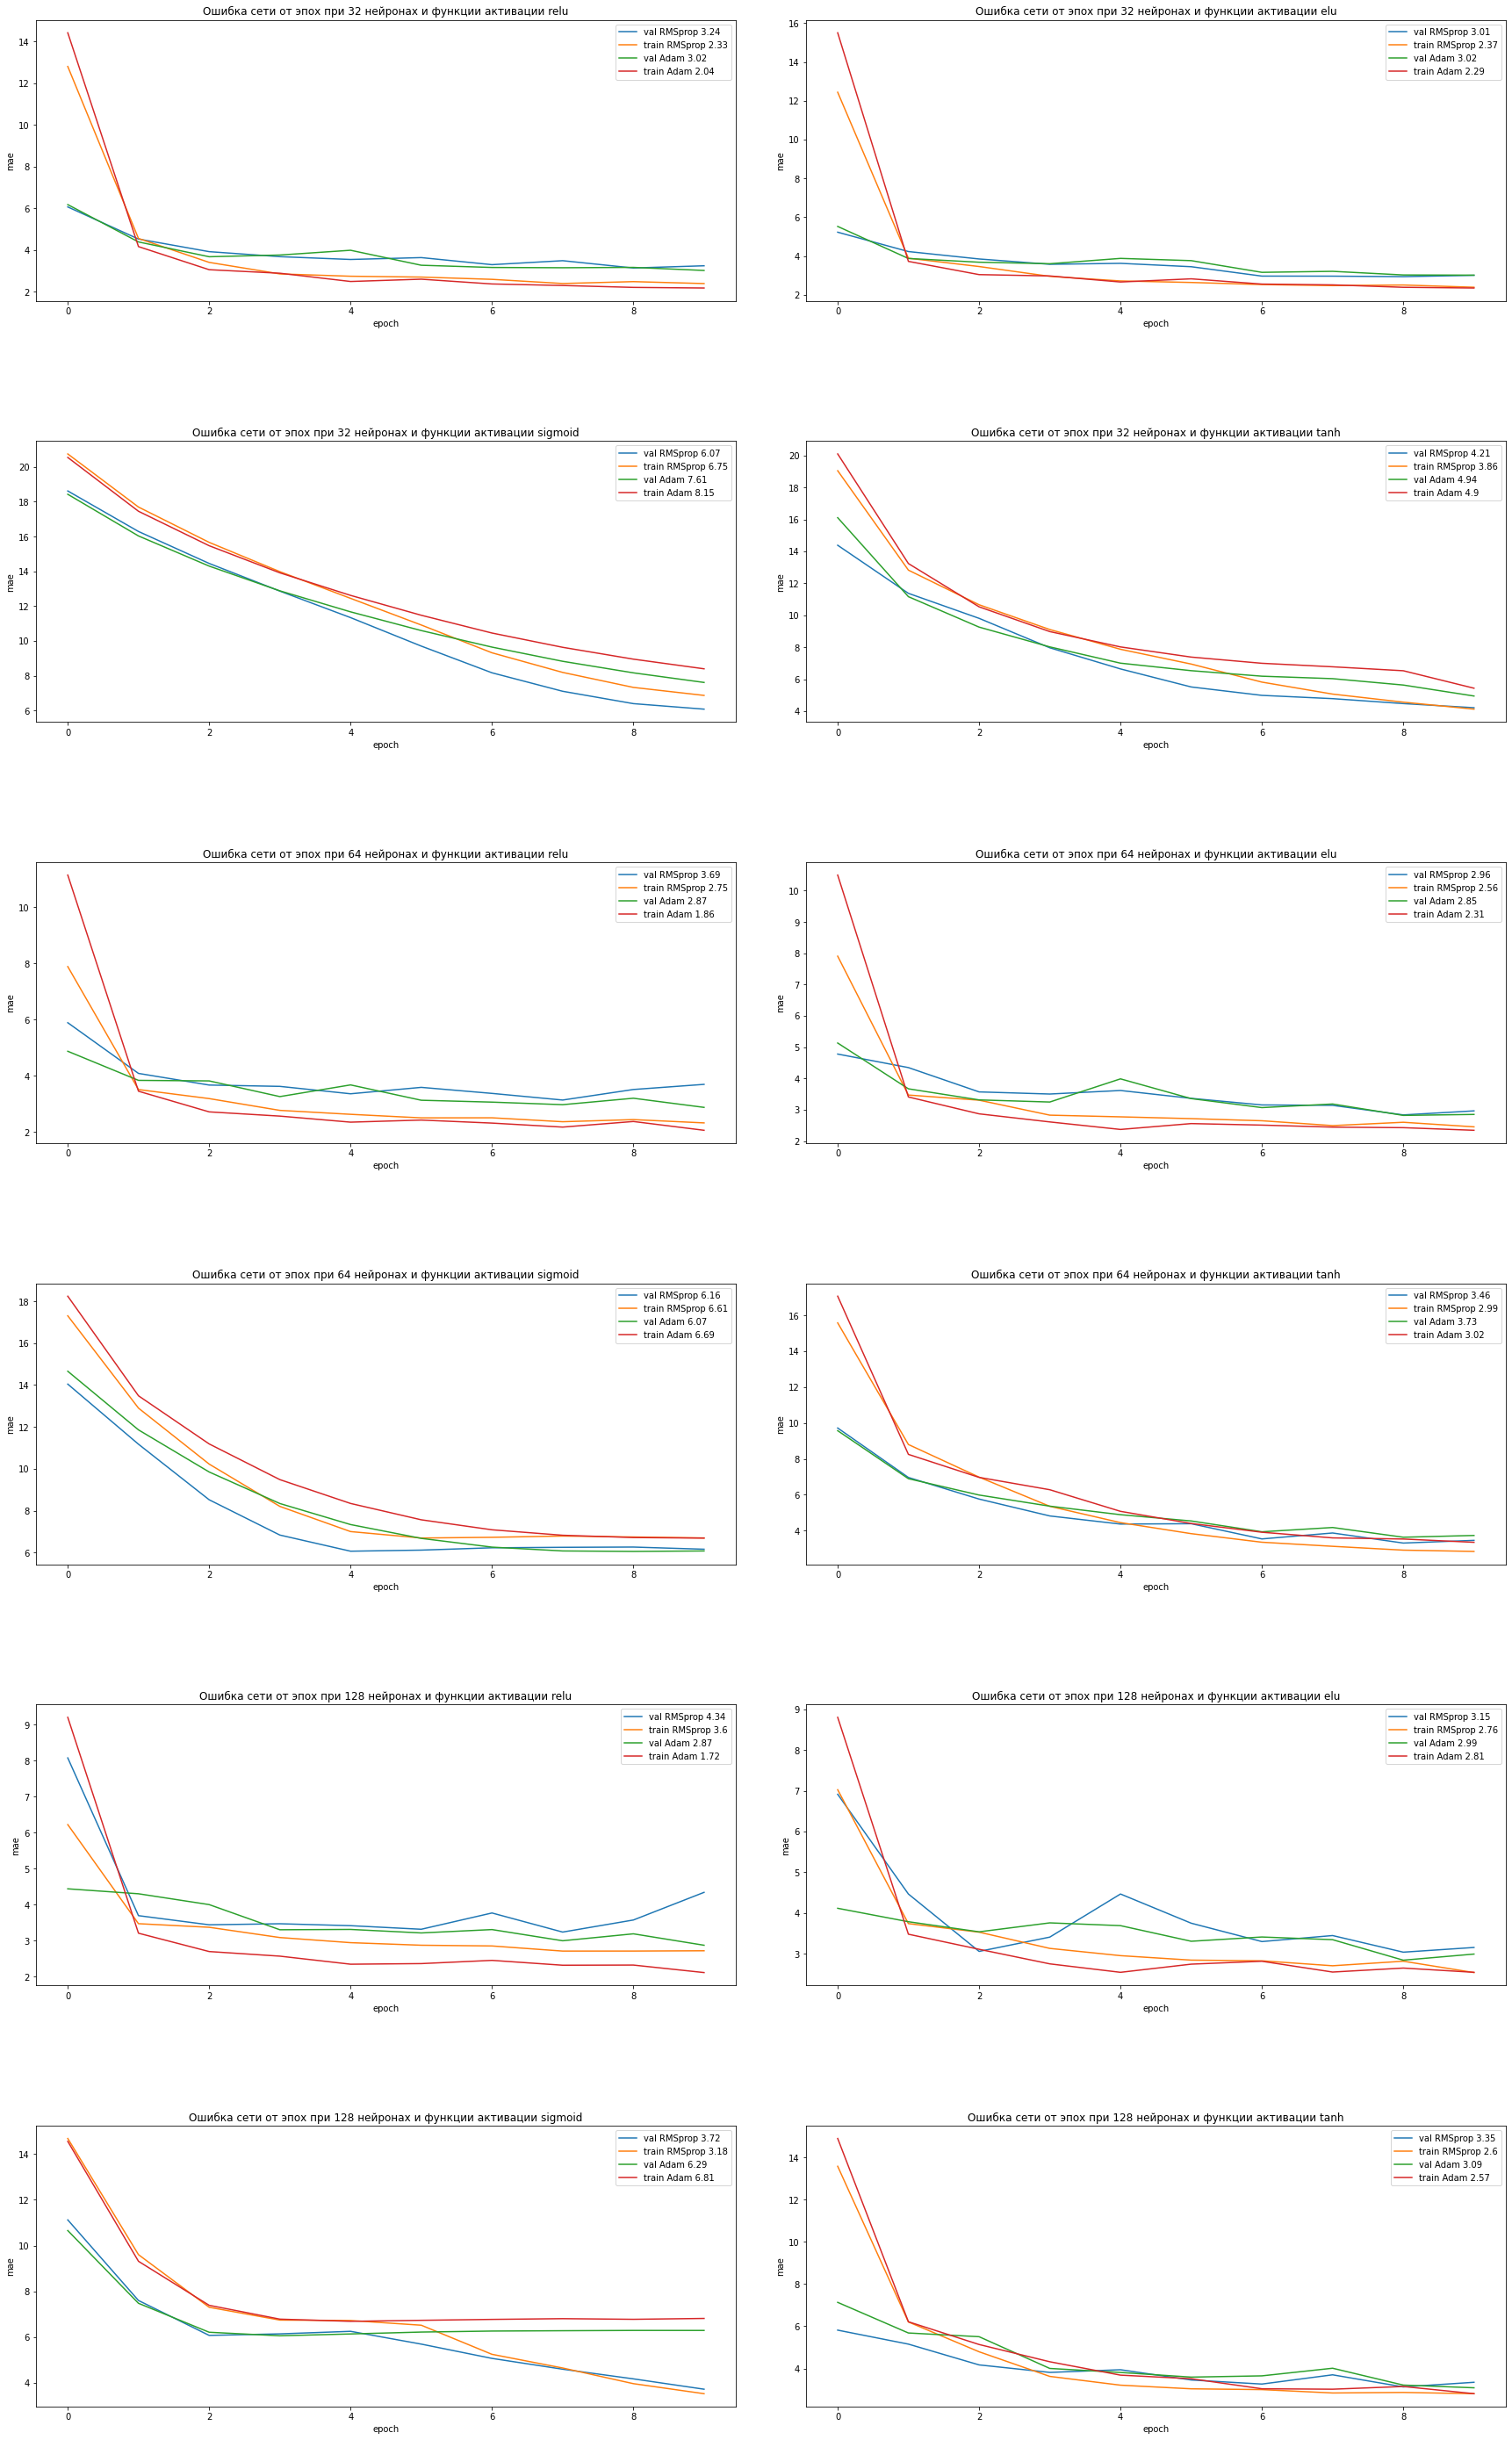

In [16]:
# Рассмотрим 8-слойную сеть
fig = plt.figure(figsize=(30, 50))
plt.subplots_adjust(wspace=0.1, hspace=0.5)
k = 0
for n in [32, 64, 128]:
  for f in ['relu', 'elu', 'sigmoid', 'tanh']:
    k += 1
    for o in ['RMSprop', 'Adam']:
      n_layers.append(8)
      n_neurons.append(n)
      act_func.append(f)
      opt.append(o)
        
      print(f'\nПараметры текущей нейронной сети: 8 слоя, {n} нейронов, функция активации {f}, оптимизатор {o}...')

      inputs = Input(shape=(13,))
      x_1 = Flatten()(inputs)
      x_2 = Dense(n, activation=f)(x_1)
      x_3 = Dense(n, activation=f)(x_2)
      x_4 = Dense(n, activation=f)(x_3)
      x_5 = Dense(n, activation=f)(x_4)
      x_6 = Dense(n, activation=f)(x_5)
      x_7 = Dense(n, activation=f)(x_6)
      outputs = Dense(1)(x_7)

      model = Model(inputs, outputs)

      model.compile(optimizer=o,
                    loss='mse',
                    metrics=['mae'])

      #model.summary()

      history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=5,
                    validation_data=(X_test, y_test), 
                    verbose=0)

      train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
      test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)
      train_mae.append(train_m)
      test_mae.append(test_m)
      
      ax = fig.add_subplot(6, 2, k)
      ax.plot(history.history['val_mae'], label=f'val {o} {round(test_m, 2)}')
      ax.plot(history.history['mae'], label=f'train {o} {round(train_m, 2)}')
      ax.legend()
      ax.set_xlabel('epoch')
      ax.set_ylabel('mae')
      ax.set(title = f'Ошибка сети от эпох при {n} нейронах и функции активации {f}')
plt.show()

In [17]:
results['n_layers'] = n_layers
results['n_neurons'] = n_neurons
results['act_func'] = act_func
results['opt'] = opt
results['train_mae'] = train_mae
results['test_mae'] = test_mae
results['overtr_diff'] = results['test_mae'] - results['train_mae']

In [18]:
results.sort_values(by=['test_mae','overtr_diff'], ascending=[True, True])

,n_layers,n_neurons,act_func,opt,train_mae,test_mae,overtr_diff
59,8,64,elu,Adam,2.311714,2.850238,0.538524
65,8,128,relu,Adam,1.724643,2.869568,1.144926
57,8,64,relu,Adam,1.864520,2.871290,1.006770
58,8,64,elu,RMSprop,2.558755,2.963812,0.405057
67,8,128,elu,Adam,2.811654,2.988780,0.177126
...,...,...,...,...,...,...,...
18,2,128,elu,RMSprop,21.783365,21.767593,-0.015772
5,2,32,sigmoid,Adam,21.793249,21.783653,-0.009596
7,2,32,tanh,Adam,21.784515,21.806881,0.022366
10,2,64,elu,RMSprop,21.756830,21.826887,0.070057


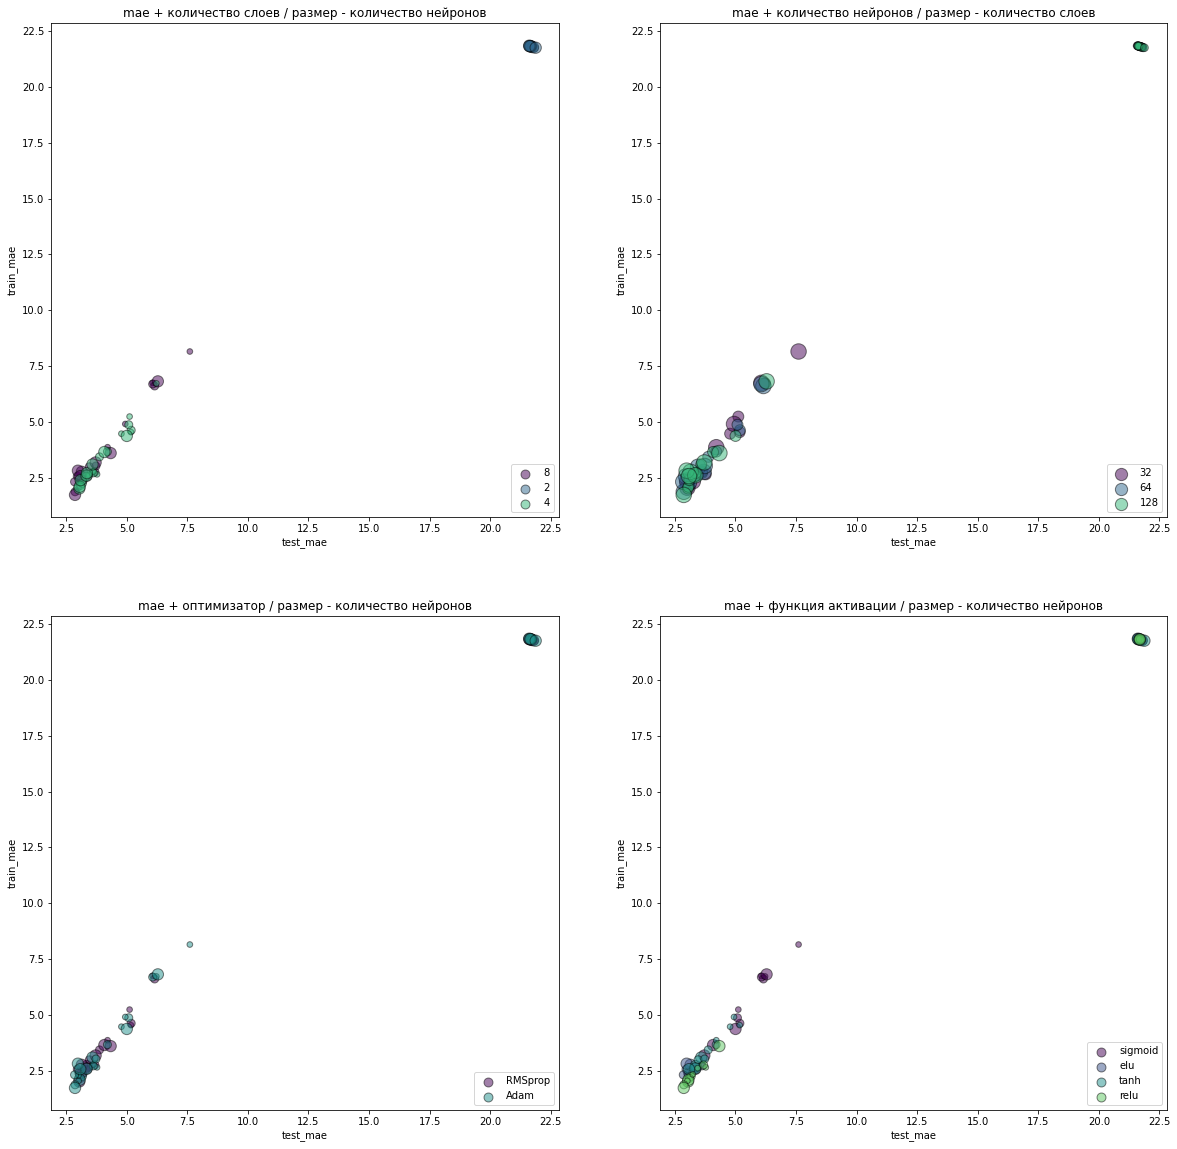

In [20]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(2, 2, 1)
ax.set_xlabel('test_mae')
ax.set_ylabel('train_mae')
ax.set_title('mae + количество слоев / размер - количество нейронов')
uniq = list(set(results['n_layers']))
z = range(1,len(uniq))
vir = plt.get_cmap('viridis')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=vir)
for i in range(len(uniq)):
    indx = results['n_layers'] == uniq[i]
    plt.scatter(results['test_mae'][indx], results['train_mae'][indx], 
                s=results['n_neurons'][indx], color=scalarMap.to_rgba(i), label=uniq[i], alpha=0.5, edgecolors = 'black')
ax.legend(loc='lower right')

ax = fig.add_subplot(2, 2, 2)
ax.set_xlabel('test_mae')
ax.set_ylabel('train_mae')
ax.set_title('mae + количество нейронов / размер - количество слоев')
uniq = list(set(results['n_neurons']))
z = range(1,len(uniq))
vir = plt.get_cmap('viridis')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=vir)
for i in range(len(uniq)):
    indx = results['n_neurons'] == uniq[i]
    plt.scatter(results['test_mae'][indx], results['train_mae'][indx], 
                s=results['n_layers'][indx]*30, color=scalarMap.to_rgba(i), label=uniq[i], alpha=0.5, edgecolors = 'black')
ax.legend(loc='lower right')

ax = fig.add_subplot(2, 2, 3)
ax.set_xlabel('test_mae')
ax.set_ylabel('train_mae')
ax.set_title('mae + оптимизатор / размер - количество нейронов')
uniq = list(set(results['opt']))
z = range(1,len(uniq))
vir = plt.get_cmap('viridis')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=vir)
for i in range(len(uniq)):
    indx = results['opt'] == uniq[i]
    plt.scatter(results['test_mae'][indx], results['train_mae'][indx], 
                s=results['n_neurons'][indx], color=scalarMap.to_rgba(i), label=uniq[i], alpha=0.5, edgecolors = 'black')
ax.legend(loc='lower right')

ax = fig.add_subplot(2, 2, 4)
ax.set_xlabel('test_mae')
ax.set_ylabel('train_mae')
ax.set_title('mae + функция активации / размер - количество нейронов')
uniq = list(set(results['act_func']))
z = range(1,len(uniq))
vir = plt.get_cmap('viridis')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=vir)
for i in range(len(uniq)):
    indx = results['act_func'] == uniq[i]
    plt.scatter(results['test_mae'][indx], results['train_mae'][indx], 
                s=results['n_neurons'][indx], color=scalarMap.to_rgba(i), label=uniq[i], alpha=0.5, edgecolors = 'black')
ax.legend(loc='lower right')

plt.show()

**Заключение**

- Если присуствует не так много тренировочных данных, предпочтительно использовать маленькую сеть с небольшим количеством скрытых слоев, чтобы исбежать переобучения.

- Лучшее качество получилось на максимальном количестве слоев(8) и среднем количестве нейронов(64).

- Наименьшая ошибка получилась с оптимизатором Adam.

- Наименьшая ошибка получилась при функции активации elu (relu не сильно отстает).

- Лушее качество получилось при [8, 64, elu, Adam]: train mae=2.311714, test mae=2.850238, overtrained diff=0.538524.

Получим предсказания модели для обех выборок:

In [21]:
inputs = Input(shape=(13,))
x_1 = Flatten()(inputs)
x_2 = Dense(64, activation='elu')(x_1)
x_3 = Dense(64, activation='elu')(x_2)
x_4 = Dense(64, activation='elu')(x_3)
x_5 = Dense(64, activation='elu')(x_4)
x_6 = Dense(64, activation='elu')(x_5)
x_7 = Dense(64, activation='elu')(x_6)
outputs = Dense(1)(x_7)

model = Model(inputs, outputs)

model.compile(optimizer='Adam',
                    loss='mse',
                    metrics=['mae'])

model.summary()

history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=5, 
                    validation_data=(X_test, y_test), 
                    verbose=1)

train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)

Model: "model_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_73 (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
flatten_72 (Flatten)         (None, 13)                0         
_________________________________________________________________
dense_264 (Dense)            (None, 64)                896       
_________________________________________________________________
dense_265 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_266 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_267 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_268 (Dense)            (None, 64)                416

In [22]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [23]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Коэффициент детерминации на тренировочной выборке: {round(r2_train,2)}')
print(f'Коэффициент детерминации на тестовой выборке: {round(r2_test,2)}')

Коэффициент детерминации на тренировочной выборке: 0.89
Коэффициент детерминации на тестовой выборке: 0.8


получилось переобучение в 9%